In [3]:
##### import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from custom_scripts import database
from custom_scripts import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#sample_number = 1000
flights_query =  f"""
                SELECT * FROM flights WHERE fl_date = '2018-10-01'
                """
#BETWEEN '2018-10-01' AND '2018-10-7'
flights = database.query(flights_query)
flights.head()

NameError: name 'sys' is not defined

In [201]:
flights.shape

(22797, 42)

In [202]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [213]:
flights_selected = flights[['fl_date','crs_dep_time','origin_airport_id','dest_airport_id','crs_elapsed_time','arr_delay']]

In [214]:
flights_selected = flights_selected.dropna(subset=['fl_date','crs_dep_time','origin_airport_id','dest_airport_id','crs_elapsed_time'])

flights_selected = flights_selected.fillna(0)

In [215]:
flights_selected = flights_selected.assign(relative_delay = 0)
flights_selected['relative_delay'] = flights_selected['arr_delay']/flights_selected['crs_dep_time']
#flights_selected = flights_selected.assign(overwhelming_rank = 0)
flights_selected = flights_selected.assign(overwhelming_rank = 0)

In [216]:
import numpy as np

for i in flights_selected.index:
    #date = flights_selected.loc[i, 'fl_date']
    airport = flights_selected.loc[i, 'origin_airport_id']
    #airport2 = flights_selected.loc[i, 'dest_airport_id']
    time = flights_selected.loc[i, 'crs_dep_time']
    filter_airport = flights_selected['origin_airport_id']==airport
    #filter_airport2 = flights_selected['origin_airport_id']==airport2
    #filter_date = flights_selected['origin_airport_id']==fl_date
    filter_time = abs(flights_selected[ 'crs_dep_time' ]-time)<=200
    count = flights_selected[filter_airport&filter_time].shape[0]
    flights_selected.loc[i, 'overwhelming_rank']=count

flights_selected.head()        


,fl_date,crs_dep_time,origin_airport_id,dest_airport_id,crs_elapsed_time,arr_delay,relative_delay,overwhelming_rank
0,2018-10-01,1420,13930,11721,69.0,0.0,0.000000,289
1,2018-10-01,900,12758,12173,49.0,-16.0,-0.017778,9
2,2018-10-01,740,12173,12758,46.0,-7.0,-0.009459,25
3,2018-10-01,1136,12402,12173,54.0,-11.0,-0.009683,5
4,2018-10-01,1607,13830,12402,39.0,-16.0,-0.009956,12


In [217]:
outliers_filter = abs(flights_selected["relative_delay"])<=1
flights_selected = flights_selected[outliers_filter]
#flights_selected["overwhelming_rank"] = flights_selected["overwhelming_rank"]/flights_selected["overwhelming_rank"].max()

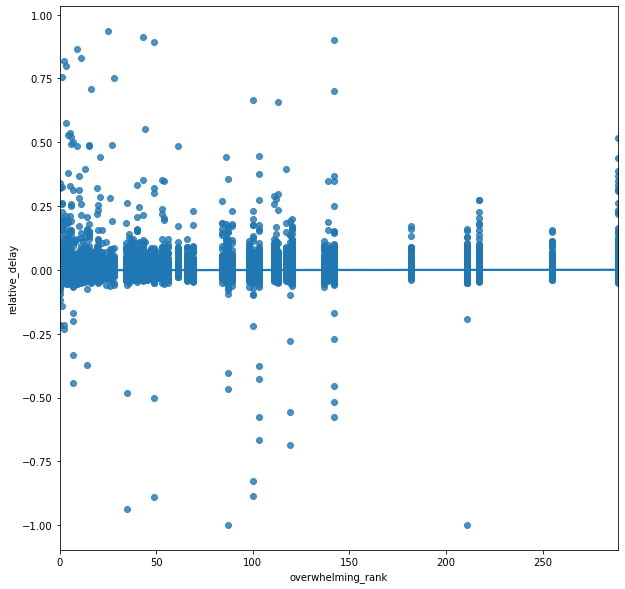

In [218]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10
sns.regplot(x="overwhelming_rank", y="relative_delay", data=flights_selected)
plt.show()